# Demo 1: Pandas and Visualizations

## Install and Load Libraries

We will need to install the pandas package. Can do it within the Anaconda navigator, through the command prompt/terminal, or from within jupyter notebook itself:

In [1]:
!pip install pandas

Now let's import it.

In [2]:
import pandas as pd

## Series vs DataFrame

Before jumping into pandas, let's look at what a basic Python series looks like. It is one-dimensional:

In [3]:
series = pd.Series(['dog', 'cat', 'frog'])

In [4]:
series

0     dog
1     cat
2    frog
dtype: object

In [5]:
colors = pd.Series(['blue','black','green'])
colors

0     blue
1    black
2    green
dtype: object

We have an index (0, 1, 2) and the elements (dog, cat, frog).  
Now if we make a DataFrame, it is two-dimensional:

In [6]:
animal_df = pd.DataFrame({"Animal": series, "Colors": colors})

In [7]:
animal_df

,Animal,Colors
0,dog,blue
1,cat,black
2,frog,green


Here, we see more of a table format. This is what most of the data we work with will look like (but larger!).

## Reading in our data!

If we are ever unsure about what a method is for or how to use it, jupyter notebook allows us to pull up the documentation by adding a '?' at the end of it. Try looking at the documentation for `pd.read_csv`.

This data is obtained from https://www.kaggle.com/datasets/jgiigii/uscrimesdataset

In [8]:
df = pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [9]:
df = pd.read_csv("../datasets/Crime.csv")

/var/folders/l9/70smnm5938z_dx4_7tr0tn8w0000gn/T/ipykernel_29287/3007349167.py:1: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/Crime.csv")


It is also possible to read in a csv from a URL rather than a local file. For example:

In [10]:
pd.read_csv("https://raw.githubusercontent.com/GoogleTrends/data/master/20170508_HealthCareSearchesUS.csv")

,"Indexed search interest in 'health care' from May 2 to May 4, 2017. 100 is the max value, and every number is relative to that.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Metropolitan Area,Search Value,Rank,NaN,
1,Helena MT (Montana United States),100,1,NaN,NaN
2,Bangor ME (Maine United States),95,2,NaN,NaN
3,Jackson TN (Tennessee United States),95,3,NaN,NaN
4,Utica NY (New York United States),86,4,NaN,NaN
...,...,...,...,...,...
206,Alpena MI (Michigan United States),35,206,NaN,NaN
207,Odessa-Midland TX (Texas United States),33,207,NaN,NaN
208,Corpus Christi TX (Texas United States),32,208,NaN,NaN
209,Twin Falls ID (Idaho United States),27,209,NaN,NaN


But for now, we will use our crime dataset.

## Describe our data

This will get us a list of our columns (aka our features).

In [11]:
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

If we want to see our features *and* their data types, we can use the following:

In [12]:
df.dtypes

Incident ID                 int64
Offence Code               object
CR Number                   int64
Dispatch Date / Time       object
NIBRS Code                 object
Victims                     int64
Crime Name1                object
Crime Name2                object
Crime Name3                object
Police District Name       object
Block Address              object
City                       object
State                      object
Zip Code                  float64
Agency                     object
Place                      object
Sector                     object
Beat                       object
PRA                        object
Address Number            float64
Street Prefix              object
Street Name                object
Street Suffix              object
Street Type                object
Start_Date_Time            object
End_Date_Time              object
Latitude                  float64
Longitude                 float64
Police District Number     object
Location      

This gives information in the index values.

In [13]:
df.index

RangeIndex(start=0, stop=306094, step=1)

Information on the 'shape' of our data. The first value is the number of rows (how many items we have). The second value is the number of columns (how many features we have).

In [14]:
df.shape

(306094, 30)

The following gives a quick overview of our data. The count, mean, standard deviation, etc... of each column. Notice how we only see information on 7 columns when we have 30 total. This can only show information on the numerical columns.

In [15]:
df.describe()

,Incident ID,CR Number,Victims,Zip Code,Address Number,Latitude,Longitude
count,3.060940e+05,3.060940e+05,306094.000000,302915.000000,2.799850e+05,306094.000000,306094.000000
mean,2.012369e+08,1.692787e+08,1.022692,20876.535939,8.393001e+03,38.146328,-75.269490
std,8.626185e+04,6.210304e+07,0.192311,170.157722,1.526296e+04,5.974082,11.786118
min,2.010871e+08,1.001107e+07,1.000000,6.000000,1.000000e+00,0.000000,-77.516753
25%,2.011625e+08,1.705431e+08,1.000000,20853.000000,1.600000e+03,39.020392,-77.197117
50%,2.012361e+08,1.900183e+08,1.000000,20878.000000,8.100000e+03,39.072844,-77.099464
75%,2.013109e+08,2.000466e+08,1.000000,20904.000000,1.250000e+04,39.142072,-77.029046
max,2.013872e+08,2.204211e+08,22.000000,29882.000000,2.090600e+06,90.000000,0.000000


## How to view and select data

To start, the below allows us to quickly view the first five entries.

In [16]:
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


Let's say we only want to view three:

In [17]:
df.head(3)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"


Or we only want to view the last five:

In [18]:
df.tail()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,TRANSHIRE,NaN,RD,02/20/2021 08:00:00 PM,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ATHERTON,NaN,DR,05/06/2021 03:15:00 AM,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,BALTUSROL,NaN,DR,05/05/2021 10:38:00 PM,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,NaN,FENTON,NaN,ST,03/13/2021 01:35:00 PM,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)"
306093,201327806,2305,210014587,04/19/2021 02:17:29 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,BETHESDA,...,NaN,NEWPORT MILL,NaN,RD,04/18/2021 04:00:00 PM,04/19/2021 12:00:00 PM,39.037115,-77.072485,2D,"(39.0371, -77.0725)"


### The difference between `.loc` and `.iloc`

Let's say for some reason, our indices are not in order from zero onwards, but are more scattered.

In [19]:
animals = pd.Series(['cat', 'dog', 'bird', 'frog'], index = [0, 3, 9, 8])

`.loc` will get us the item at **index of 3**

In [20]:
animals.loc[3]

'dog'

`.iloc` will get us the item at the **position of 3** regardless of index values.

In [21]:
animals.iloc[3]

'frog'

On selecting multiple items (this is very similar to the practice you all got with lists):

In [22]:
animals.iloc[1:]

3     dog
9    bird
8    frog
dtype: object

What happens if we try to use `animals.loc[1:]`?

In [23]:
df.loc[2:5]

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
5,201204355,2404,180043926,09/03/2018 12:06:54 PM,240,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


### Viewing a specific column

In [24]:
df['City']

0                 GERMANTOWN
1                   BETHESDA
2                   BETHESDA
3               GAITHERSBURG
4                CHEVY CHASE
                 ...        
306089    MONTGOMERY VILLAGE
306090         SILVER SPRING
306091            GERMANTOWN
306092         SILVER SPRING
306093            KENSINGTON
Name: City, Length: 306094, dtype: object

### How do we filter our data?

In [25]:
df.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [26]:
df['Crime Name1'].unique()

array(['Crime Against Society', 'Crime Against Property',
       'Crime Against Person', 'Other', 'Not a Crime', nan], dtype=object)

In [27]:
df_crimes = df[df['Crime Name1'] != 'Not a Crime']

In [28]:
df_crimes

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,TRANSHIRE,NaN,RD,02/20/2021 08:00:00 PM,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ATHERTON,NaN,DR,05/06/2021 03:15:00 AM,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,BALTUSROL,NaN,DR,05/05/2021 10:38:00 PM,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,NaN,FENTON,NaN,ST,03/13/2021 01:35:00 PM,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


What if we want to see the counts per `Crime Name1`? 

In [29]:
df_crimes.groupby(['Crime Name1']).size()

Crime Name1
Crime Against Person       30270
Crime Against Property    139882
Crime Against Society      68917
Other                      63178
dtype: int64

In [30]:
df.groupby(['Crime Name1']).size()

Crime Name1
Crime Against Person       30270
Crime Against Property    139882
Crime Against Society      68917
Not a Crime                 3575
Other                      63178
dtype: int64

## Manipulating data

#### Editing string values

Let's say we need to standardize our data and have everything in `Crime Name1` be in lowercase?

In [31]:
df['Crime Name1'] = df['Crime Name1'].str.lower()

In [32]:
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,crime against society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,crime against property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"


#### Dealing with null values

First of all, let's take a look at the different columns that have null values. If an item is missing a particular column value, what could that mean? e.g., is it possible for a particular zip code to not be recorded properly? Do the end date times mean it is simply missing and someone forgot to record it, or maybe that information is not known to begin with?

In [33]:
df.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

How we end up dealing with nulls depends on the context of the data and the problem/questions you are looking to solve. We could simply drop all null rows in the dataset using `df.dropna()`. But what if one column has many many nulls, but we aren't really planning on using that column anyways? It may be better to drop that individual column instead, for example: `df.drop('End_Date_Time', axis=1)`. Note that `axis=0` specifies you are trying to drop rows (it is this by default), and `axis=1` specifies that you are trying to drop column(s). If you ever forget which is which, try looking at the docuentation using: `df.drop?`

Notice how this drops literally everything.

In [34]:
df.dropna()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location


If we run `df` again, we see that things weren't actually dropped. If we wanted to drop values *and* update the df, we would need to use either `df = df.dropna()` or `df.dropna('inplace=True')`

In [35]:
df.drop('End_Date_Time', axis = 1, inplace=True)

In [36]:
df

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,crime against society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,12800.0,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,8300.0,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,8300.0,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,400.0,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,crime against property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,4800.0,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,crime against person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,19300.0,NaN,TRANSHIRE,NaN,RD,02/20/2021 08:00:00 PM,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,crime against property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,12500.0,NaN,ATHERTON,NaN,DR,05/06/2021 03:15:00 AM,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,crime against society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,300.0,NaN,BALTUSROL,NaN,DR,05/05/2021 10:38:00 PM,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,crime against society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,7700.0,NaN,FENTON,NaN,ST,03/13/2021 01:35:00 PM,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


## Visualizing with Matplotlib!

With will explore two libraries for making visualizations in python. One is Matplotlib and the other is Seaborn. To start, let's install and import matplotlib:

In [37]:
!pip install matplotlib

In [38]:
import matplotlib.pyplot as plt

Take a look at the documentation first.

In [39]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x1425e3e80>
File:           ~/Documents/GitHub/.venv/lib/python3.9/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area pl

#### Crime counts

Remember how we used `groupby` earlier?

In [40]:
df.groupby('Crime Name1').size()

Crime Name1
crime against person       30270
crime against property    139882
crime against society      68917
not a crime                 3575
other                      63178
dtype: int64

<Axes: xlabel='Crime Name1'>

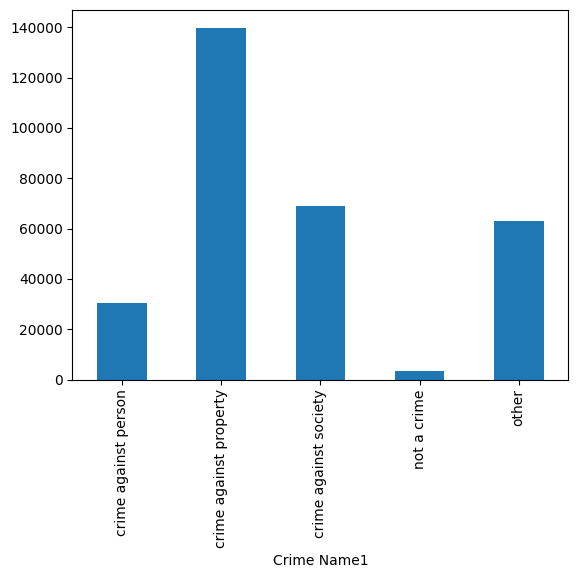

In [41]:
df.groupby('Crime Name1').size().plot(kind='bar')

Now perhaps we want to dig deeper into crime against property. First, let's filter out just those:

In [42]:
df_property_crimes = df[df['Crime Name1'] == 'crime against property']

Now we can group by `Crime Name2` and plot that!

Text(0.5, 0, 'Crime Names')

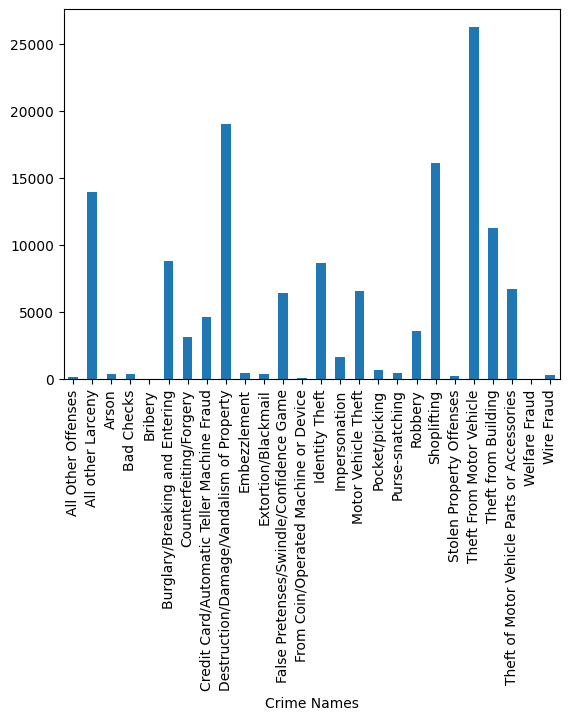

In [43]:
df_property_crimes.groupby('Crime Name2').size().plot(kind='bar')
plt.xlabel('Crime Names')

This is a bit small, so let's increase the size.

In [44]:
plt.rcParams['figure.figsize'] = (12,6)

<Axes: xlabel='Crime Name2'>

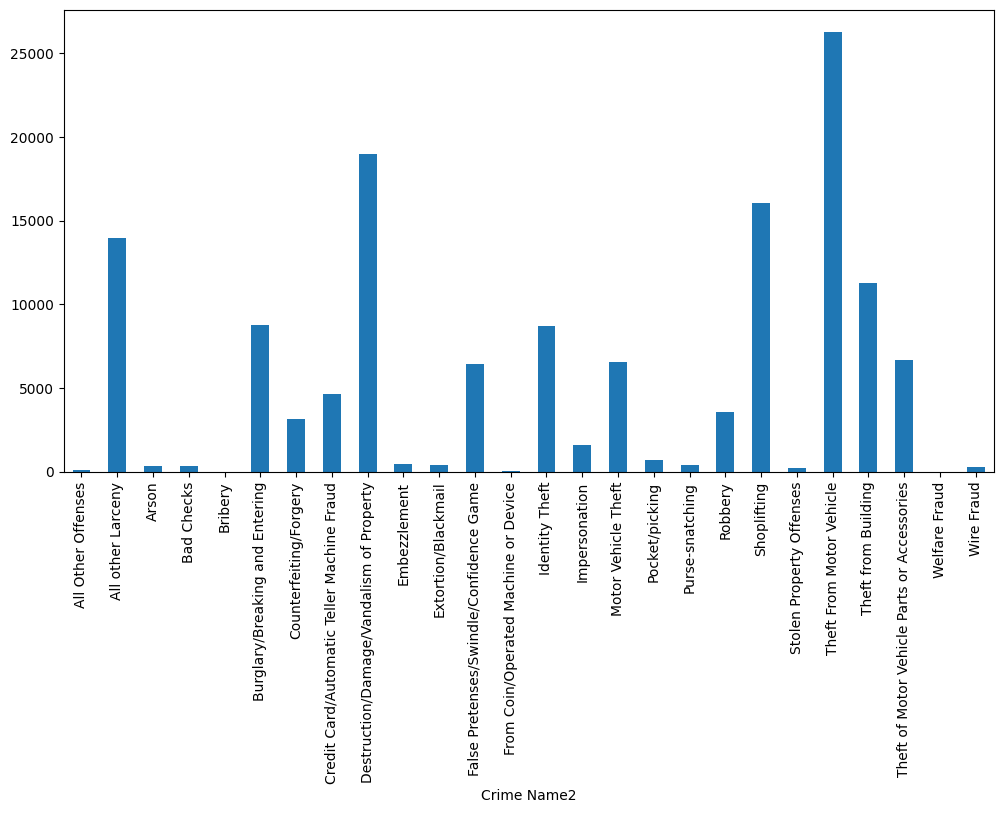

In [45]:
df_property_crimes.groupby('Crime Name2').size().plot(kind='bar')

This is just *one small example* of things Matplotlib can do. It will be important to look through documentation, experiment, and ask questions! It is OK (and encouraged) to look things up (just make sure you cite your resources)!

## Some visualizations with Seaborn now!  
More info here: https://seaborn.pydata.org/  
They have a gallery and various tutorials.

Once again, let's import everything first.

In [46]:
!pip install seaborn

In [47]:
import seaborn as sns

#### We want to explore the crime rate across different times.

Let's make a new column for the date, and then for month, day, and hour.

In [48]:
df['date'] = pd.to_datetime(df['Dispatch Date / Time'])

/var/folders/l9/70smnm5938z_dx4_7tr0tn8w0000gn/T/ipykernel_29287/4114952573.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Dispatch Date / Time'])


The above will make it easier to prase month, day, and hour now. Also, here is a reference [link](https://www.kaggle.com/code/sady36/visualization-uscrimesdataset). (I admit, I was about to do this in a much slower and painful way before seeing this notebook. So again, don't be afraid to look things up and use your resources!)   
By the way, all of this below counts as pre-processing. We are making new columns based on the original `Dispatch Date / Time` one!

In [49]:
df["month"] = df["date"].apply(lambda x: x.month_name())
df["day_name"] = df["date"].apply(lambda x: x.day_name())
df["hour"] = df["date"].apply(lambda x: x.hour)

Look how nice this looks now!

In [50]:
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Type,Start_Date_Time,Latitude,Longitude,Police District Number,Location,date,month,day_name,hour
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,crime against society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,RD,08/23/2018 09:52:00 PM,39.177744,-77.265619,5D,"(39.1777, -77.2656)",2018-08-23 21:52:08,August,Thursday,21.0
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,AVE,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018-03-30 01:00:55,March,Friday,1.0
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,AVE,03/30/2018 01:01:00 AM,38.992693,-77.097063,2D,"(38.9927, -77.0971)",2018-03-30 01:00:55,March,Friday,1.0
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,crime against society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,RD,06/14/2018 10:26:00 PM,39.147954,-77.218189,6D,"(39.148, -77.2182)",2018-06-14 22:26:45,June,Thursday,22.0
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,crime against property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,AVE,09/02/2018 11:30:00 PM,38.966174,-77.096561,2D,"(38.9662, -77.0966)",2018-09-03 12:06:54,September,Monday,12.0


First, let's again filter out anything that is in the dataset and "not a crime."

In [51]:
df_filtered = df[df['Crime Name1'] != 'not a crime']

Now, let's visualize the counts of crimes per hour.

<Axes: xlabel='hour', ylabel='count'>

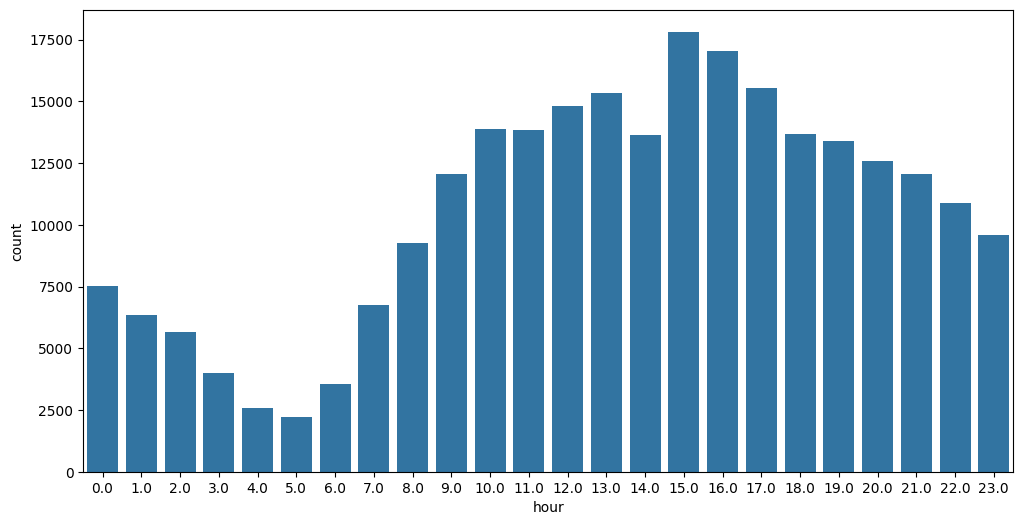

In [52]:
sns.countplot(x='hour', data=df_filtered)

In [53]:
df_filtered['Crime Name1'].unique()

array(['crime against society', 'crime against property',
       'crime against person', 'other', nan], dtype=object)

Perhaps we want to only see the types of crime against property per hour.

<Axes: xlabel='hour', ylabel='count'>

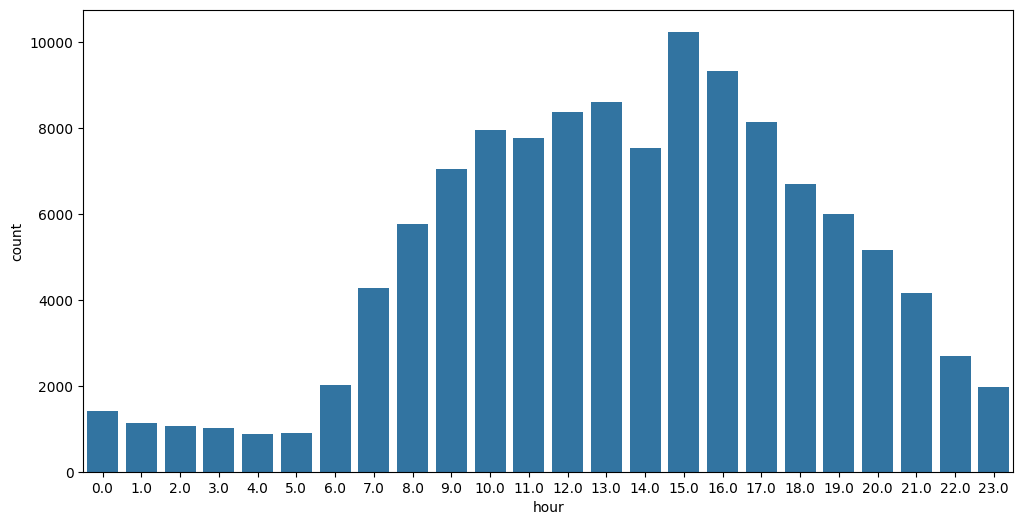

In [54]:
sns.countplot(x='hour', data=df[df['Crime Name1'] == 'crime against property'])

We don't see too much of a difference...

<Axes: xlabel='hour', ylabel='count'>

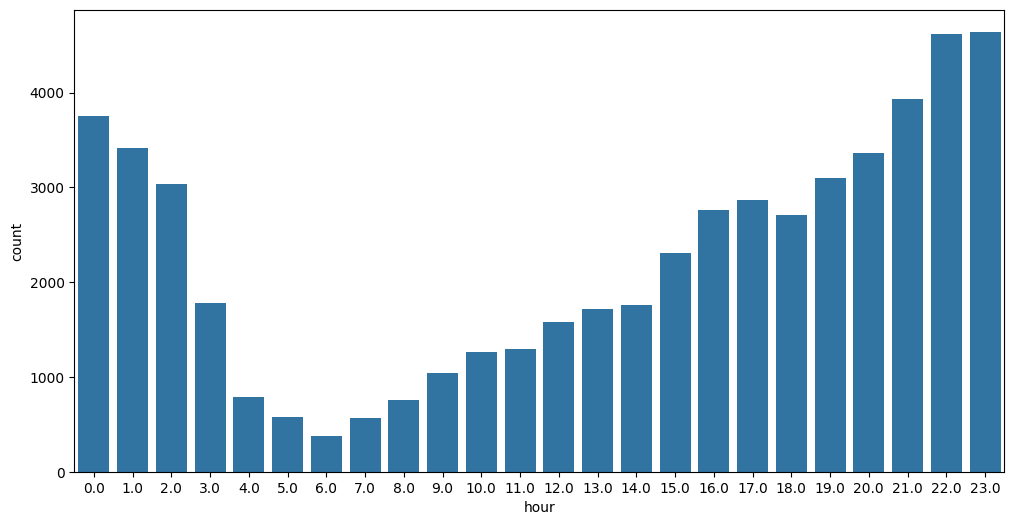

In [55]:
sns.countplot(x='hour', data=df[df['Crime Name1'] == 'crime against society'])

While crimes against society are less than against property, we see a change in the distribution!

Now let's do crimes against people and give it a nice title so readers know what is happening here! A quick resource on how to add a title [here](https://www.tutorialspoint.com/how-to-add-a-title-on-seaborn-lmplot#).

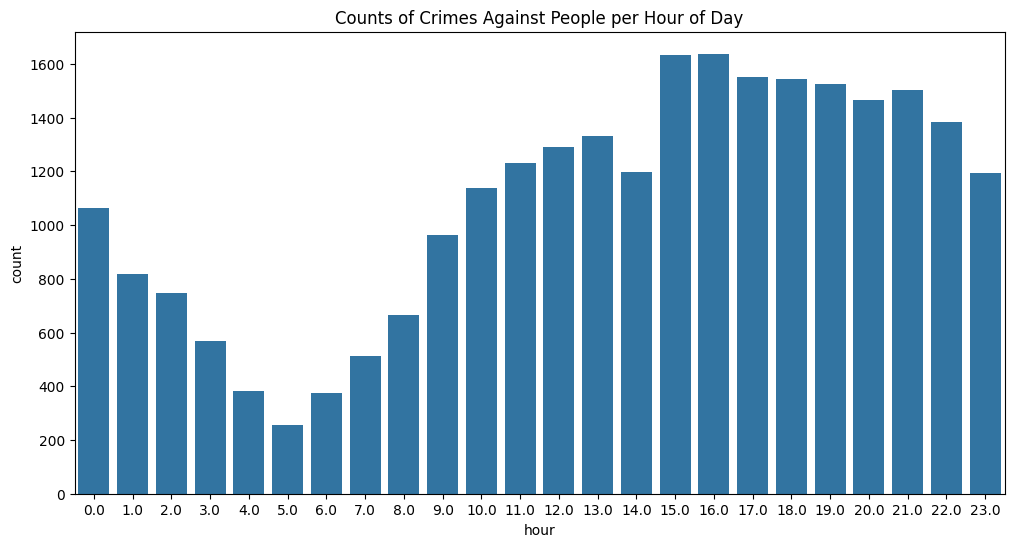

In [56]:
plot = sns.countplot(x='hour', data=df[df['Crime Name1'] == 'crime against person'])
ax = plt.gca()
ax.set_title("Counts of Crimes Against People per Hour of Day")
plt.show()

Notice how intentional we were about our question and the visualization we chose to make for it. And then it is possible for other questions to come up throughout that exploration.